In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NationalNames.csv').dropna()
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


# Task 1

In [3]:
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# Task 2

In [4]:
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


# Task 4

In [5]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [6]:
df.drop_duplicates(subset = 'Name').count()['Count']

93889

In [7]:
df.groupby('Gender')['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

In [8]:
df.query('Year == 2010 and Gender == "M"').sort_values(by=['Count'], ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [9]:
year = 2002
name = df.query(f"Year == {year}").sort_values(by=['Count'], ascending=False)[:1]['Name'].iloc[0]
f"The name is {name} in {year}"

'The name is Jacob in 2002'

In [10]:
df.query(f"Count == {df['Count'].min()}")['Count'].size

254615

In [11]:
df.groupby('Year')['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [12]:
df.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

In [13]:
df.query("Year == 2008").sort_values(by=['Count'], ascending=False)[:1]['Name'].iloc[0]

'Jacob'

In [14]:
male = df.query('Gender == "M"').groupby('Year')['Count'].sum()
female = df.query('Gender == "F"').groupby('Year')['Count'].sum()
(female > male).sum()

54

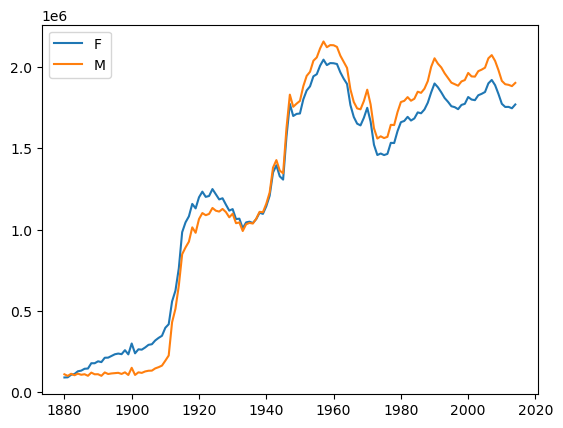

In [15]:
plt.plot(female)
plt.plot(male)
plt.legend(['F', 'M'])

In [16]:
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
male.isin(female).sum()

10221

In [17]:
df.query('Name == "Barbara" and Gender == "M"')['Count'].sum()

4139

In [18]:
male = df.query('Gender == "M"').drop_duplicates(subset=['Name'])
female = df.query('Gender == "F"').drop_duplicates(subset=['Name'])

neutural_names = male[male['Name'].isin(female['Name'])]
years_count = df['Year'].unique().size
neutural_names_all_years = df[df.Name.isin(neutural_names['Name'])].groupby('Name')['Year'].count().sort_values(ascending=False).to_frame().query(f'Year == {years_count * 2}')
df[df.Name.isin(neutural_names_all_years.index)].groupby('Name')['Count'].sum().sort_values(ascending=False).to_frame()

,Count
Name,
James,5129096
John,5106590
Robert,4816785
William,4071368
Joseph,2580687
Jean,480901
Jesse,421406
Leslie,376587
Francis,312147


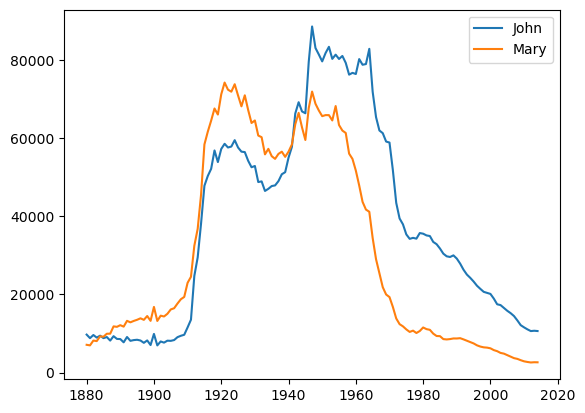

In [19]:
john = df.query('Name == "John"').groupby('Year')['Count'].sum()
mary = df.query('Name == "Mary"').groupby('Year')['Count'].sum()
plt.plot(john)
plt.plot(mary)
plt.legend(['John', 'Mary'])

In [20]:
df.groupby(['Year']).apply(lambda d: d[d.Count == d.Count.max()].iloc[0][['Name', 'Count']]).reset_index()

,Year,Name,Count
0,1880,John,9655
1,1881,John,8769
2,1882,John,9557
3,1883,John,8894
4,1884,John,9388
...,...,...,...
130,2010,Isabella,22883
131,2011,Sophia,21816
132,2012,Sophia,22267
133,2013,Sophia,21147
